In [100]:
from carbon.sdk import CarbonSDK, Tokens as T
#from carbon import CarbonOrderUI, CarbonSimulatorUI
from carbon.helpers.widgets import CheckboxManager, DropdownManager, PcSliderManager
from matplotlib import pyplot as plt
import numpy as np
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonSDK))
!node --version

CarbonSDK v0.9 (8/Mar/2023)
v18.14.2


# Order Book [NB10]

In order to start the server, please run

    source /Volumes/Private/bin/sdkserver
    node server/sdkserver.mjs

In [101]:
SDK = CarbonSDK(disclaimer=False, verbose=False, Tokens=T)
SDK.version().get("msg")

'Carbon SDK v0.9 (7/Mar/2022)'

## Order book related functions

#### `pairs`


In [102]:
pairs, pairs_s = SDK.pairs(inclstr=True)
pairs_s

'USDC/USDT, USDC/ETH, BNT/USDT, BNT/USDC, USDT/ETH, WBTC/USDC, DAI/MATIC, LINK/USDC, DAI/ETH, MKR/USDC, DAI/USDC, UNI/USDC, DAI/BNB'

In [103]:
try:
    pairs_sel = [s.strip() for s in pairs_s.split(",")]
    pairs_w()
except:
    pairs_w = DropdownManager(pairs_sel)
    pairs_w()

Dropdown(options=(('USDC/USDT', 'USDC/USDT'), ('USDC/ETH', 'USDC/ETH'), ('BNT/USDT', 'BNT/USDT'), ('BNT/USDC',…

In [104]:
try:
    inverse_w()
except:
    inverse_w = CheckboxManager(["inverse"])
    inverse_w()

In [105]:
tknb,tknq = pairs_w.value.split("/")
if inverse_w.values[0]:
    tknb,tknq = tknq, tknb
pair = f"{tknb}/{tknq}"
pair

'USDC/USDT'

#### `mHasLiquidityByPair` and `mHasLiquidityByPairs`

In [106]:
help(SDK.mHasLiquidityByPair)

Help on method mHasLiquidityByPair in module carbon.sdk.sdk:

mHasLiquidityByPair(pair, AMMsells) method of carbon.sdk.sdk.CarbonSDK instance
    whether a specfic pair has any open liquidity positions
    
    :pair:          pair (as CarbonPair object)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       whether the directed pair has liquidity (boolean)



In [107]:
help(SDK.mHasLiquidityByPairs)

Help on method mHasLiquidityByPairs in module carbon.sdk.sdk:

mHasLiquidityByPairs(pairs) method of carbon.sdk.sdk.CarbonSDK instance
    whether a list of pairs has any open liquidity positions in any direction
    
    :pairs:     list of pairs (as CarbonPair objects or slashpair strings),
                or a string of slashpairs separeted by commas



In [108]:
SDK.mHasLiquidityByPair(pair=pair, AMMsells=tknb)

False

In [109]:
SDK.mHasLiquidityByPairs(pairs=pair)

({'pair': P('USDC/USDT'), 'AMMsells': 'USDT', 'hasLiquidity': False},
 {'pair': P('USDC/USDT'), 'AMMsells': 'USDC', 'hasLiquidity': False})

In [110]:
SDK.mHasLiquidityByPairs(pairs="ETH/USDC, WBTC/USDC, WBTC/BNT")

({'pair': P('ETH/USDC'), 'AMMsells': 'USDC', 'hasLiquidity': True},
 {'pair': P('ETH/USDC'), 'AMMsells': 'ETH', 'hasLiquidity': True},
 {'pair': P('WBTC/USDC'), 'AMMsells': 'USDC', 'hasLiquidity': True},
 {'pair': P('WBTC/USDC'), 'AMMsells': 'WBTC', 'hasLiquidity': True},
 {'pair': P('WBTC/BNT'), 'AMMsells': 'BNT', 'hasLiquidity': False},
 {'pair': P('WBTC/BNT'), 'AMMsells': 'WBTC', 'hasLiquidity': False})

#### `mGetLiquidityByPair`

In [111]:
help(SDK.mGetLiquidityByPair)

Help on method mGetLiquidityByPair in module carbon.sdk.sdk:

mGetLiquidityByPair(pair, AMMsells) method of carbon.sdk.sdk.CarbonSDK instance
    liquidity values for multiple pairs
    
    :pair:          pair (as CarbonPair object or slashpair string)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       RangeByPair object



In [112]:
(SDK.mGetLiquidityByPair(pair=pair, AMMsells=tknb),
 SDK.mGetLiquidityByPair(pair=pair, AMMsells=tknq))

(CarbonSDK.PairLiquidity(amount=0.0, unit='USDC', AMMsells='USDC', bidAsk='ask', pair=P('USDC/USDT'), rate=None, inverted=None, islist=None),
 CarbonSDK.PairLiquidity(amount=0.0, unit='USDT', AMMsells='USDT', bidAsk='bid', pair=P('USDC/USDT'), rate=None, inverted=None, islist=None))

In [113]:
SDK.mGetLiquidityByPair(pair="WBTC/BNT", AMMsells="BNT")

CarbonSDK.PairLiquidity(amount=0.0, unit='BNT', AMMsells='BNT', bidAsk='bid', pair=P('WBTC/BNT'), rate=None, inverted=None, islist=None)

#### `mGetRangeByPair`


In [114]:
help(SDK.mGetRangeByPair)

Help on method mGetRangeByPair in module carbon.sdk.sdk:

mGetRangeByPair(pair, AMMsells) method of carbon.sdk.sdk.CarbonSDK instance
    gets the minimum and maximum exchange rate offered on Carbon between those two tokens
    
    :pair:          pair (as CarbonPair object or slashpair string)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       RangeByPair object



In [115]:
(SDK.mGetRangeByPair(pair=pair, AMMsells=tknb),
 SDK.mGetRangeByPair(pair=pair, AMMsells=tknq))

(CarbonSDK.RangeByPair(startRate=-0.0, endRate=0.0, AMMsells='USDC', AMMbuys='USDT', bidAsk='ask', pair=P('USDC/USDT'), inverted=False),
 CarbonSDK.RangeByPair(startRate=-inf, endRate=inf, AMMsells='USDT', AMMbuys='USDC', bidAsk='bid', pair=P('USDC/USDT'), inverted=True))

#### `mGetRateLiquidityDepthByPair`

In [116]:
help(SDK.mGetRateLiquidityDepthByPair)

Help on method mGetRateLiquidityDepthByPair in module carbon.sdk.sdk:

mGetRateLiquidityDepthByPair(rate, pair, AMMsells) method of carbon.sdk.sdk.CarbonSDK instance
    liquidity depth (ie cumulative liquidity) at a given exchange rate
    
    :rate:          rate at which liquidity is evaluated (in units of the pair)
                    if the rate is an Array then the liquidity is evaluated at each rate
    :pair:          pair (as CarbonPair object or slashpair string)
    :AMMsells:      the token the AMM sells (as token name)
    :returns:       RangeByPair object; if rate is an Array so is the amount



In [117]:
SDK.mGetRateLiquidityDepthByPair(rate=2400, pair=pair, AMMsells=tknb)

CarbonSDK.PairLiquidity(amount=0.0, unit='USDC', AMMsells='USDC', bidAsk='ask', pair=P('USDC/USDT'), rate=2400, inverted=True, islist=False)

CarbonSDK.PairLiquidity(amount=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], unit='USDT', AMMsells='USDT', bidAsk='bid', pair=P('USDC/USDT'), rate=array([2400.        , 2367.34693878, 2334.69387755, 2302.04081633,
       2269.3877551 , 2236.73469388, 2204.08163265, 2171.42857143,
       2138.7755102 , 2106.12244898, 2073.46938776, 2040.81632653,
       2008.16326531, 1975.51020408, 1942.85714286, 1910.20408163,
       1877.55102041, 1844.89795918, 1812.24489796, 1779.59183673,
       1746.93877551, 1714.28571429, 1681.63265306, 1648.97959184,
       1616.32653061, 1583.67346939, 1551.02040816, 1518.36734694,
       1485.71428571, 1453.06122449, 1420.40816327, 1387.75510204,
       1355.10204082, 1322.44897959, 1289.79591837, 1257.14285714,
       1224.48979592, 1191.83673469, 1159.18

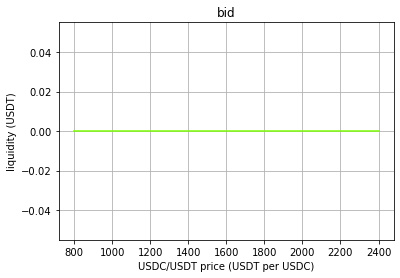

In [118]:
r = SDK.mGetRateLiquidityDepthByPair(rate=np.linspace(2400, 800), pair=pair, AMMsells=tknq)
plt.plot(r.rate, r.amount, color="red" if r.bidAsk=="ask" else "lawngreen")
plt.xlabel(f"{r.pair.slashpair} price ({r.pair.price_convention})")
plt.ylabel(f"liquidity ({r.unit})")
plt.title(r.bidAsk)
plt.grid()
r

CarbonSDK.PairLiquidity(amount=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], unit='USDC', AMMsells='USDC', bidAsk='ask', pair=P('USDC/USDT'), rate=array([2400.        , 2412.24489796, 2424.48979592, 2436.73469388,
       2448.97959184, 2461.2244898 , 2473.46938776, 2485.71428571,
       2497.95918367, 2510.20408163, 2522.44897959, 2534.69387755,
       2546.93877551, 2559.18367347, 2571.42857143, 2583.67346939,
       2595.91836735, 2608.16326531, 2620.40816327, 2632.65306122,
       2644.89795918, 2657.14285714, 2669.3877551 , 2681.63265306,
       2693.87755102, 2706.12244898, 2718.36734694, 2730.6122449 ,
       2742.85714286, 2755.10204082, 2767.34693878, 2779.59183673,
       2791.83673469, 2804.08163265, 2816.32653061, 2828.57142857,
       2840.81632653, 2853.06122449, 2865.30

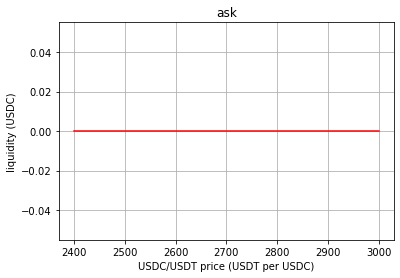

In [119]:
r = SDK.mGetRateLiquidityDepthByPair(rate=np.linspace(2400, 3000), pair=pair, AMMsells=tknb)
plt.plot(r.rate, r.amount, color="red" if r.bidAsk=="ask" else "lawngreen")
plt.xlabel(f"{r.pair.slashpair} price ({r.pair.price_convention})")
plt.ylabel(f"liquidity ({r.unit})")
plt.title(r.bidAsk)
plt.grid()
r